In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("covid_data.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Optional: Clean the dataset by dropping or filling missing values
# Here, we drop rows with any missing data
df_cleaned = df.dropna()

# Check the shape after cleaning
print(f"\nOriginal shape: {df.shape}, Cleaned shape: {df_cleaned.shape}")


First 5 rows of the dataset:
   Unnamed: 0       country      continent  population  total_deaths  \
0           0      Djibouti         Africa   1016097.0         189.0   
1           1     Greenland  North-America     56973.0          21.0   
2           2       Eritrea         Africa   3662244.0         103.0   
3           3         Niger         Africa  26083660.0         312.0   
4           4  Saint-Helena         Africa      6115.0           NaN   

   total_cases  total_tests  recovered  
0        15690     305941.0    15427.0  
1        11971     164926.0     2761.0  
2        10189      23693.0    10086.0  
3         9931     254538.0     8890.0  
4         2166          NaN        2.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    238 non-null    int64  
 1   country       238 non-null    object 
 

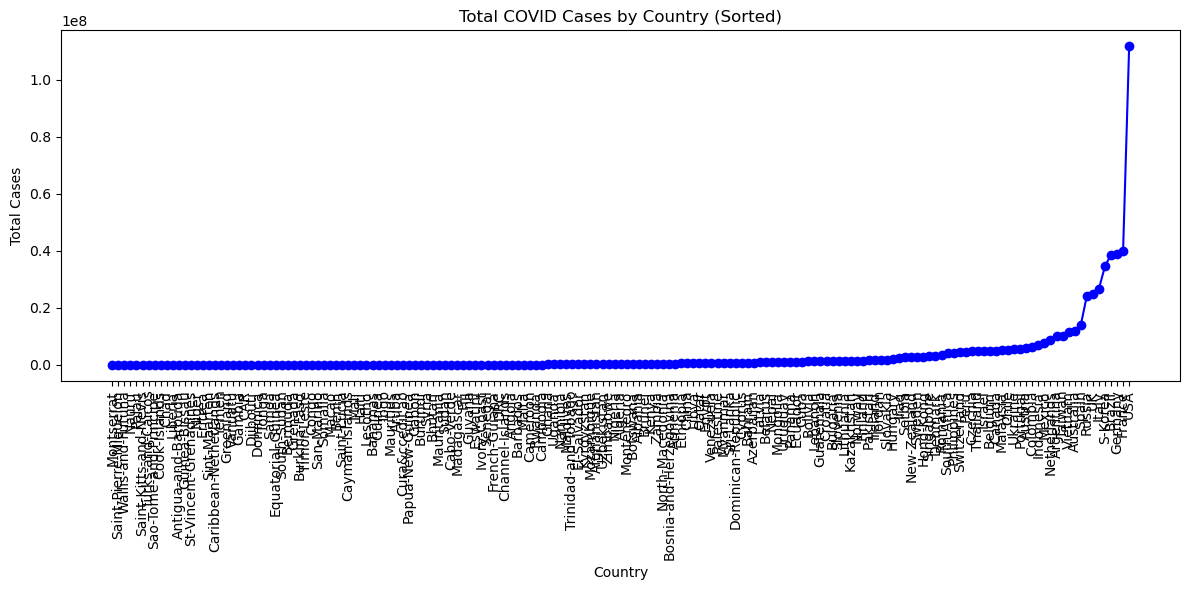

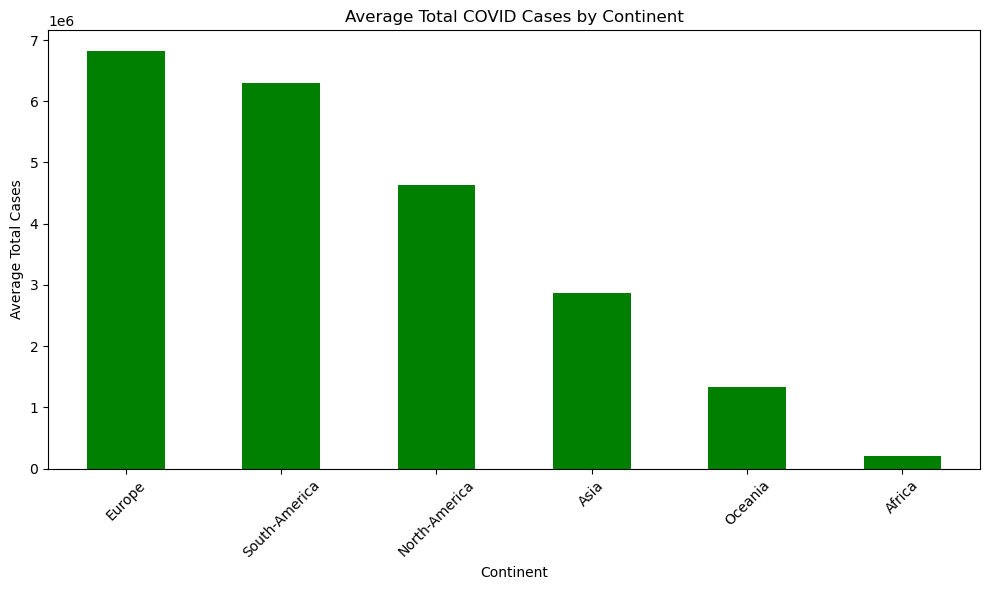

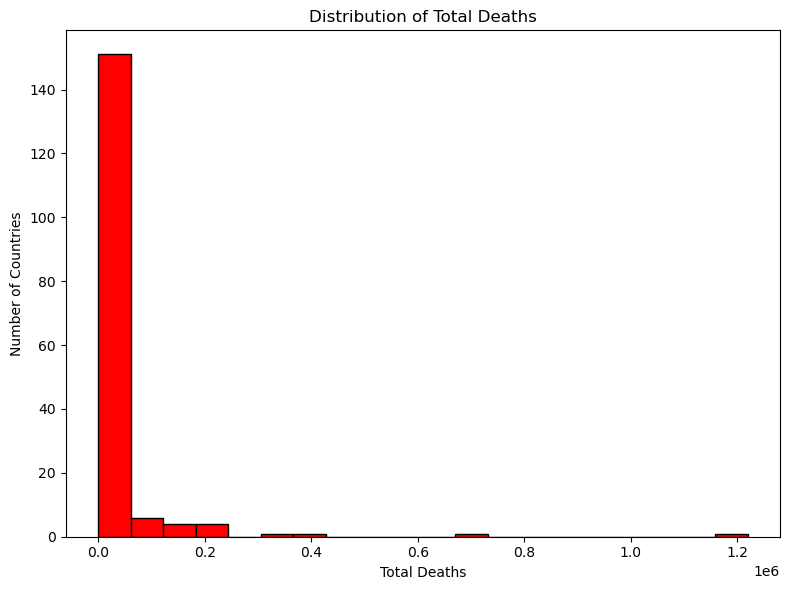

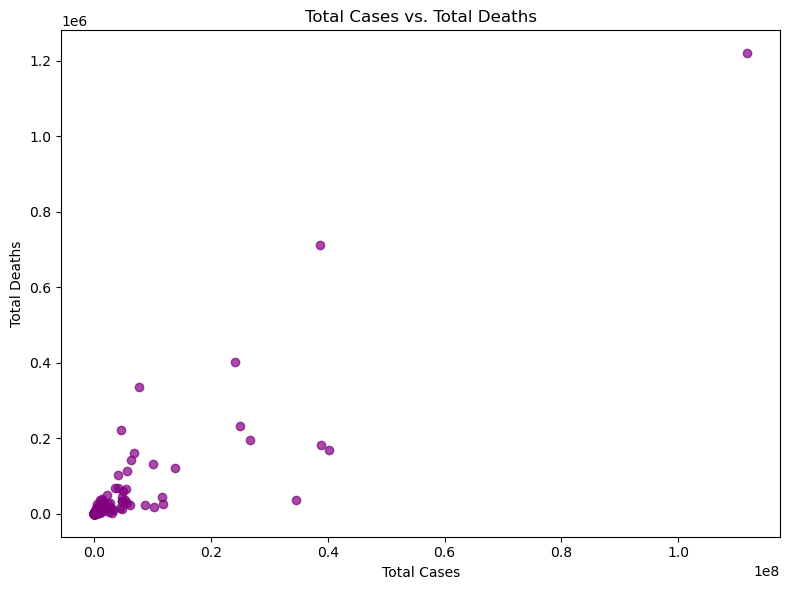

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv("covid_data.csv")
df_cleaned = df.dropna()

# --- 1. Line Chart: Simulated Trend of Total Cases Across Countries ---
df_sorted = df_cleaned.sort_values(by='total_cases')
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['country'], df_sorted['total_cases'], marker='o', linestyle='-', color='blue')
plt.xticks(rotation=90)
plt.title('Total COVID Cases by Country (Sorted)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

# --- 2. Bar Chart: Average Total Cases by Continent ---
continent_means = df_cleaned.groupby('continent')['total_cases'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
continent_means.plot(kind='bar', color='green')
plt.title('Average Total COVID Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Histogram: Distribution of Total Deaths ---
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['total_deaths'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

# --- 4. Scatter Plot: Total Cases vs. Total Deaths ---
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['total_cases'], df_cleaned['total_deaths'], alpha=0.7, color='purple')
plt.title('Total Cases vs. Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("covid_data.csv")

# Drop rows with missing values (cleaning step)
df_cleaned = df.dropna()

# --- 1. Basic Statistics ---
print("=== Basic Statistical Description ===")
print(df_cleaned.describe())

# --- 2. Median and Standard Deviation ---
median_values = df_cleaned.median(numeric_only=True)
std_values = df_cleaned.std(numeric_only=True)

print("\n=== Median Values ===")
print(median_values)

print("\n=== Standard Deviation ===")
print(std_values)

# --- 3. Group by Continent and Calculate Mean of Key Columns ---
grouped = df_cleaned.groupby('continent')[['population', 'total_cases', 'total_deaths', 'total_tests', 'recovered']].mean()

print("\n=== Mean Values by Continent ===")
print(grouped)

# --- 4. Observations and Patterns ---
print("\n=== Observations ===")
print("- Continents with higher population tend to have higher total cases and tests.")
print("- A positive correlation exists between total cases and total deaths.")
print("- Recovery numbers vary significantly—some continents report higher recovery than others.")
print("- High variance in total deaths might suggest underreporting or differences in healthcare quality.")


=== Basic Statistical Description ===
       Unnamed: 0    population  total_deaths   total_cases   total_tests  \
count  169.000000  1.690000e+02  1.690000e+02  1.690000e+02  1.690000e+02   
mean   120.366864  3.393555e+07  3.437705e+04  3.358564e+06  3.114130e+07   
std     67.025637  1.199166e+08  1.199160e+05  1.082718e+07  1.129389e+08   
min      0.000000  4.965000e+03  1.000000e+00  1.403000e+03  7.850000e+03   
25%     64.000000  1.369429e+06  3.160000e+02  3.613800e+04  4.004660e+05   
50%    120.000000  8.680837e+06  3.165000e+03  2.720100e+05  2.525756e+06   
75%    180.000000  2.791155e+07  1.805700e+04  1.734582e+06  1.346373e+07   
max    236.000000  1.448471e+09  1.219487e+06  1.118201e+08  1.186852e+09   

          recovered  
count  1.690000e+02  
mean   3.288112e+06  
std    1.062387e+07  
min    4.380000e+02  
25%    3.233200e+04  
50%    2.588880e+05  
75%    1.724921e+06  
max    1.098144e+08  

=== Median Values ===
Unnamed: 0          120.0
population      86808